# Transfer Learning using a pre-trained model from Tensorflow Hub(tf2-preview/mobilenet_v2/classification)

Link -> https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4

In [10]:
# Installing a package

!pip install pillow

import numpy as np
import cv2

import PIL.Image as Image
import os
import urllib.request

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub # pip install tensorflow_hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

> Make predictions using an already trained model(without any training)

In [3]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [4]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

## Scaling/normalizing the image

> This is how to open an image from a link using the Image.open()

Link -> https://www.geeksforgeeks.org/how-to-open-an-image-from-the-url-in-pil/

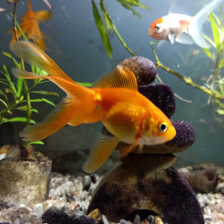

In [16]:
urllib.request.urlretrieve('https://www.startpage.com/av/proxy-image?piurl=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2Fa%2Fae%2FKatri.jpg&sp=1643887892T544c0d3d93a723f06fe40eab9a2115f544e288f200f485e5150f3466a307d7f0', 'goldfish.jpg')
img=Image.open('goldfish.jpg').resize(IMAGE_SHAPE)
img

In [18]:
gold_fish=np.array(img)/255.0
gold_fish

array([[[0.25098039, 0.30588235, 0.34117647],
        [0.25098039, 0.30588235, 0.34117647],
        [0.2627451 , 0.31764706, 0.35294118],
        ...,
        [0.78823529, 0.88235294, 0.92941176],
        [0.72941176, 0.82745098, 0.8745098 ],
        [0.65882353, 0.76078431, 0.84705882]],

       [[0.25098039, 0.30588235, 0.34117647],
        [0.25882353, 0.31372549, 0.34901961],
        [0.26666667, 0.32156863, 0.35686275],
        ...,
        [0.76862745, 0.8627451 , 0.90196078],
        [0.71764706, 0.81176471, 0.8627451 ],
        [0.65882353, 0.76078431, 0.84313725]],

       [[0.25098039, 0.30588235, 0.34117647],
        [0.25882353, 0.31372549, 0.34901961],
        [0.25490196, 0.30980392, 0.34509804],
        ...,
        [0.7372549 , 0.82352941, 0.84313725],
        [0.68235294, 0.77254902, 0.83529412],
        [0.6627451 , 0.74901961, 0.83137255]],

       ...,

       [[0.69411765, 0.65098039, 0.63529412],
        [0.74509804, 0.69019608, 0.65882353],
        [0.74509804, 0

In [20]:
gold_fish.shape

(224, 224, 3)

In [21]:
gold_fish[np.newaxis,...].shape  # We are adding one more dimension over here because when we are doing predicitions, we know that prediction accepts multiple images as input and we cannot have only one image as an input. Tha's why we are doing this.

(1, 224, 224, 3)

In [23]:
classifier.predict(gold_fish[np.newaxis,...]) # Probability of each of the classes.

array([[ 0.2441636 ,  2.5483825 ,  9.879251  , ..., -1.353992  ,
        -0.13162634, -0.28572816]], dtype=float32)

In [24]:
result=classifier.predict(gold_fish[np.newaxis,...])
result

array([[ 0.2441636 ,  2.5483825 ,  9.879251  , ..., -1.353992  ,
        -0.13162634, -0.28572816]], dtype=float32)

In [26]:
predicted_label_index=np.argmax(result) # Gives the index which has the max. value.
predicted_label_index

2

In [29]:
tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

'/root/.keras/datasets/ImageNetLabels.txt'

In [33]:
image_labels=[]
with open('/content/drive/MyDrive/Colab Notebooks/ImageNetLabels.txt', 'r') as f:
  image_labels=f.read().splitlines()

image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [34]:
image_labels[predicted_label_index]

'goldfish'

## Loading the Flower Dataset

In [35]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228827136/228813984 [==============================] - 2s 0us/step


In [36]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [37]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/roses/2568105249_15720d081f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15060816740_68e1b2c31b.jpg'),
 PosixPath('datasets/flower_photos/roses/2609353769_dc3654f12f.jpg'),
 PosixPath('datasets/flower_photos/roses/410425647_4586667858.jpg'),
 PosixPath('datasets/flower_photos/roses/5050969148_a0090f762a.jpg')]

In [38]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [39]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/2568105249_15720d081f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15060816740_68e1b2c31b.jpg'),
 PosixPath('datasets/flower_photos/roses/2609353769_dc3654f12f.jpg'),
 PosixPath('datasets/flower_photos/roses/410425647_4586667858.jpg'),
 PosixPath('datasets/flower_photos/roses/5050969148_a0090f762a.jpg')]

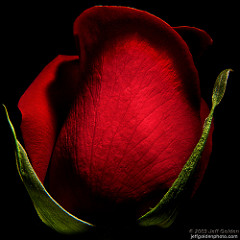

In [42]:
Image.open(str(roses[69]))

In [43]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [44]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [45]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/2568105249_15720d081f_n.jpg'),
 PosixPath('datasets/flower_photos/roses/15060816740_68e1b2c31b.jpg'),
 PosixPath('datasets/flower_photos/roses/2609353769_dc3654f12f.jpg'),
 PosixPath('datasets/flower_photos/roses/410425647_4586667858.jpg'),
 PosixPath('datasets/flower_photos/roses/5050969148_a0090f762a.jpg')]

In [47]:
img=cv2.imread(str(flowers_images_dict['roses'][69]))
img.shape

(240, 240, 3)

In [49]:
cv2.resize(img, IMAGE_SHAPE).shape

(224, 224, 3)

In [50]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [51]:
X=np.array(X)
y=np.array(y)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [53]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [55]:
predicted= classifier.predict(np.array([X[0],X[1],X[2]]))
predicted=np.argmax(predicted, axis=1)
predicted

array([722, 795, 795])

In [56]:
image_labels[722]

'pillow'

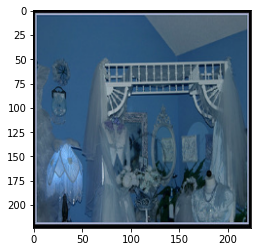

In [64]:
plt.imshow(X[0])

## Model not predicting correctly.

>  This model is not predicting collectly, to increase the prediction probabilities, we have to use this same model but remove the last layer or the output layer of the model.

> This model is same as the previous one except the last layer of the model. We want to include all of the layers which doesn't include the last layer.

> All of the layers except the last layer is given by the feature vector.

In [67]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False) 

## Training on a model without the last layer.

> 'trainable=False means freeze the layers. Freeze means do not train'

> When we perform a training on all of those layers then we will have fixed weights.

In [68]:
feature_extractor_model

'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

In [70]:
num_of_flowers=5

model=tf.keras.Sequential([
            pretrained_model_without_top_layer,
            tf.keras.layers.Dense(num_of_flowers)               
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [71]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
92/92 [==============================] - 93s 961ms/step - loss: 0.7813 - acc: 0.7064
Epoch 2/5
92/92 [==============================] - 79s 858ms/step - loss: 0.4177 - acc: 0.8498
Epoch 3/5
92/92 [==============================] - 80s 874ms/step - loss: 0.3296 - acc: 0.8907
Epoch 4/5
92/92 [==============================] - 79s 860ms/step - loss: 0.2760 - acc: 0.9138
Epoch 5/5
92/92 [==============================] - 79s 858ms/step - loss: 0.2380 - acc: 0.9312


In [72]:
model.evaluate(X_test_scaled,y_test)

23/23 [==============================] - 20s 860ms/step - loss: 0.3675 - acc: 0.8692


[0.3675018548965454, 0.8692098259925842]